In [46]:
! pip install opencv-python-headless
! pip install ultralytics

In [47]:
from ultralytics import YOLO
import cv2
from PIL import Image
from IPython.display import display
import numpy as np
import urllib.request

In [56]:
# Load a pretrained YOLOv8 model
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 136MB/s]


In [57]:
# Path to the input image
image_path = "/content/sample_data/yolov8/image_mma.jpg"
image = cv2.imread(image_path)

In [58]:
# Perform object detection using YOLOv8
results = model(image)


0: 448x640 8 persons, 9.2ms
Speed: 3.4ms preprocess, 9.2ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


In [61]:
# Extract detected objects from the results
detected_objects = results[0].boxes[0]

In [59]:
# List of classes used for action detection
action_classes = ["stand", "kick", "punch", "grappling"]

In [62]:
# Analyze the detected objects
shorts_objects = []
for result in detected_objects:
  if len(result) >= 6:
    class_id = int(result[5])
    if model.names[class_id] in action_classes:
        label = model.names[class_id]
        if label == "shorts":
            shorts_objects.append(result)

In [63]:
# Draw bounding boxes on the image for detected shorts
image_with_boxes = np.array(image)
for result in shorts_objects:
  if len(result) >= 6:
    class_id = int(result[5])
    label = model.names[class_id]
    color = (0, 255, 0)  # Green color
    x1, y1, x2, y2 = map(int, result[:4])
    cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), color, 2)
    cv2.putText(image_with_boxes, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

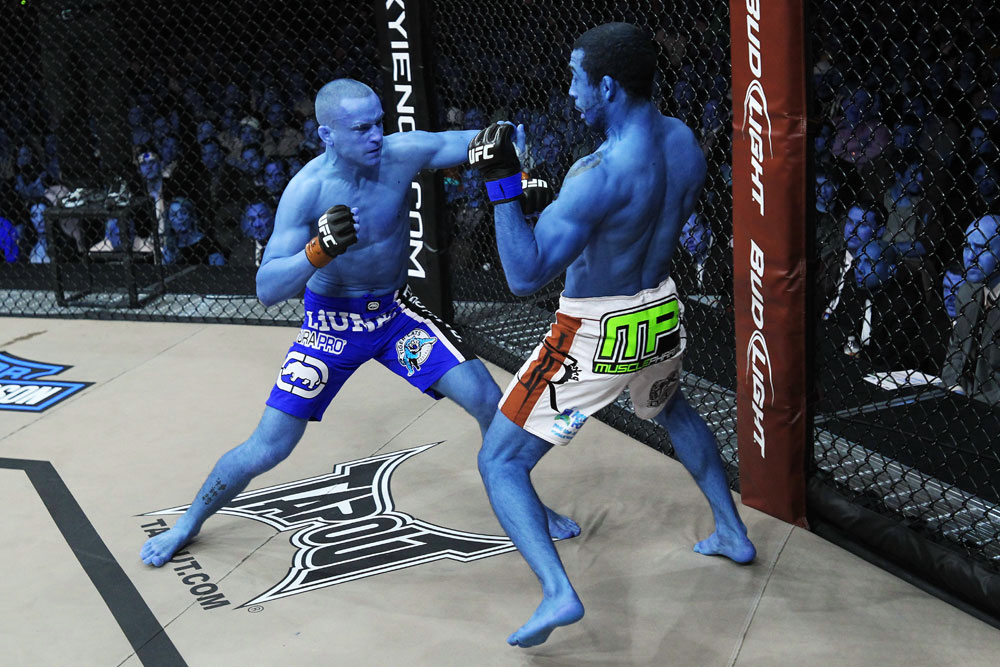

In [64]:
# Display the image with bounding boxes
display(Image.fromarray(image_with_boxes))

In [33]:
# Iterate over the detected objects and extract ROIs
rois = []
for result in detected_objects:
    # Ensure that the result has enough elements
    if len(result) >= 7:
        class_id = int(result[6])
        if model.names[class_id] in action_classes:
            x1, y1, x2, y2 = map(int, result[:4])
            roi = image.crop((x1, y1, x2, y2))
            rois.append(roi)

In [34]:
# Analyze color in the ROIs and make an assumption about shorts color
assumed_shorts_color = None
for roi in rois:
    # Convert ROI to HSV color space
    hsv_roi = roi.convert("HSV")

    # Calculate color histogram
    hist_hue = hsv_roi.histogram(mask=hsv_roi.split()[0], bins=256)

    # Find the most dominant hue (color)
    max_hue_index = hist_hue.index(max(hist_hue))
    assumed_shorts_color = max_hue_index  # Update this with your logic to determine color

In [40]:
# Draw bounding boxes on the image
image_with_boxes = np.array(image)
for result in detected_objects:
  if len(result) >= 7:
    class_id = int(result[6])
    label = model.names[class_id]
    color = (0, 255, 0)  # Green color
    x1, y1, x2, y2 = map(int, result[:4])
    cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), color, 2)
    cv2.putText(image_with_boxes, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

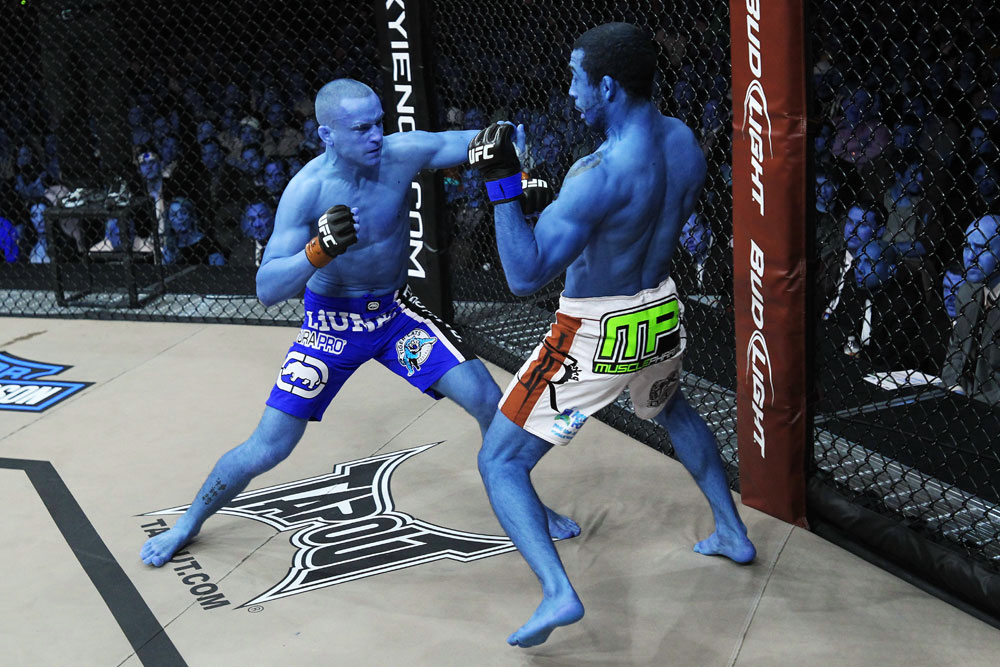

In [41]:
# Display the image with bounding boxes
display(Image.fromarray(image_with_boxes))